In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_context('talk')

from pathlib import Path
data_dir = Path('/content/datasets_13720_18513_insurance.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_1 = pd.read_csv("/content/datasets_33180_43520_heart.csv")
df_1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# 0 null values in this dataframe (which is always good news).
df_1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df_1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


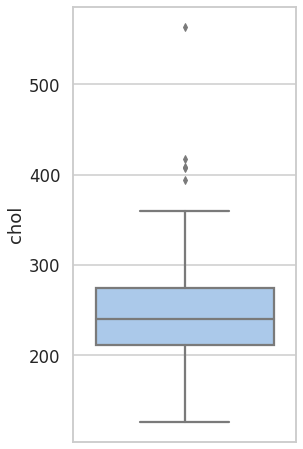

In [ ]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df_1.chol)

Looking at this box plot, we can determine that there are outliers in this data.

# Interquartile Range Method

##### Interquartile Range (IQR) is used to build boxplot graphs. IQR is a concept in statistics used to measure dispersion and data variability by dividing datasets into quartiles.

##### Datasets can be divided into four defined intervals based on data values and how they relate to the entire dataset. A quartile is what divides data into three points and four intervals.

In [ ]:
# Let's find the IQR:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
out_iqr(df_1,'chol')

The IQR is 63.5
The lower bound value is 115.75
The upper bound value is 369.75
Total number of outliers are 5


##### There are 5 outliers here:

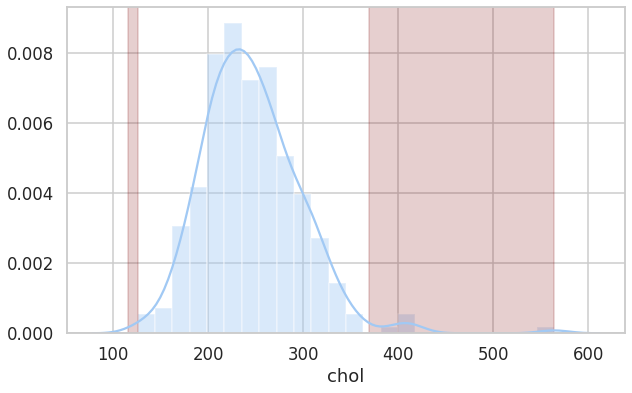

In [ ]:
# The red "zone" represents the "outlier zone"
# Records in that zone are considered outliers

plt.figure(figsize = (10,6))
sns.distplot(df_1.chol, kde=True)
plt.axvspan(xmin = lower,xmax= df_1.chol.min(),alpha=0.2, color='#850f0f')
plt.axvspan(xmin = upper,xmax= df_1.chol.max(),alpha=0.2, color='#850f0f')

##### Removing records both above the upper-bound value and the ones below the lower-bound value:

In [ ]:
# DataFrame without outliers:

df_new = df_1[(df_1['chol'] < upper) | (df_1['chol'] > lower)]

# Standard Deviation Method:

##### The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance. ... If the data points are further from the mean, there is a higher deviation within the data set; thus, the more spread out the data, the higher the standard deviation.

In [ ]:
df_2 = pd.read_csv("/content/datasets_74977_169835_StudentsPerformance.csv")
df_2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


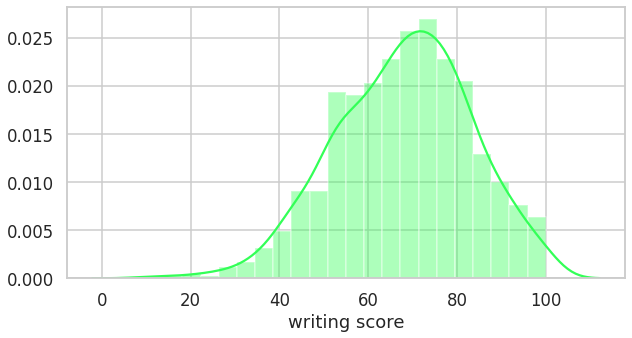

In [ ]:
# Let's inspect the writing score
# We wwill use a simple density plot, which is great at detecting outliers

plt.figure(figsize = (10,5))
sns.distplot(df_2['writing score'], color='#33FF57')

In [ ]:
# This definitely has some outliers!

In [ ]:
# Let's define a function to realize lower/upper whisker, using SDM:

def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

out_std(df_2,'writing score')

The lower bound value is 22.467028967391073
The upper bound value is 113.64097103260893
Total number of outliers are 4


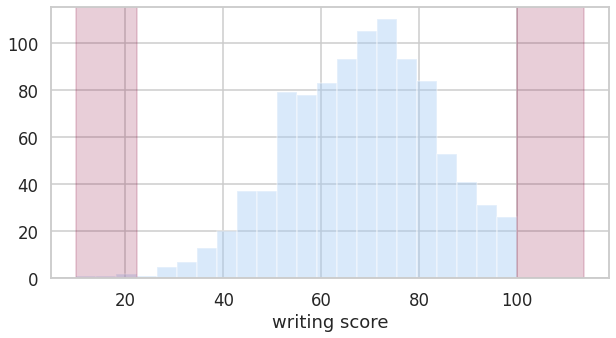

In [ ]:
# There appears to be four outliers

plt.figure(figsize = (10,5))
sns.distplot(df_2['writing score'], kde=False)
plt.axvspan(xmin = lower,xmax= df_2['writing score'].min(),alpha=0.2, color='#900C3F')
plt.axvspan(xmin = upper,xmax= df_2['writing score'].max(),alpha=0.2, color='#900C3F')

##### Remember, the "red zone" is the outlier zone! Anything within this zone are considered outliers!

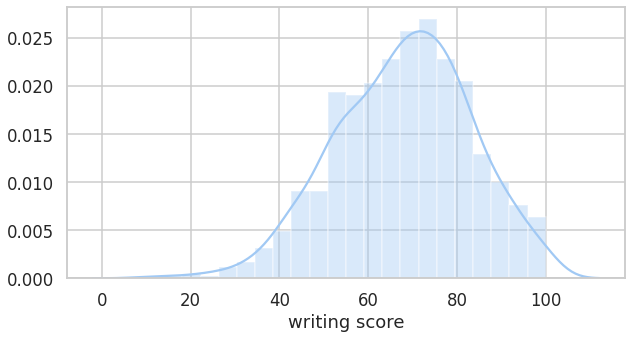

In [ ]:
# Let's present a outlier-free DataFrame:

df_new = df_2[(df_2['writing score'] < upper) | (df_2['writing score'] > lower)]
plt.figure(figsize = (10,5))
sns.distplot(df_new['writing score'])

# Z-Score Method:

##### The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

##### This technique assumes a Gaussian distribution of the data. The outliers are the data points that are in the tails of the distribution and therefore far from the mean. How far depends on a set threshold zthr for the normalized data points zi calculated with the formula:

##### Z_score= (Xi - mean) / standard deviation

##### where Xi is a data point, 'mean' is the mean of all X and 'standard deviation' the standard deviation of all X.
##### An outlier is then a normalized data point which has an absolute value greater than Zthr. That is:
|Z_score| > Zthr

##### Commonly used Zthr values are 2.5, 3.0 and 3.5. Here we will be using 3.0
##### For example, I'll take up the TMedical Cost Personal Datasets for explaining Z-Score method.

In [ ]:
df_3 = pd.read_csv("/content/datasets_13720_18513_insurance.csv")
df_3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Performing EDA to analyze the data:

df_3.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df_3.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

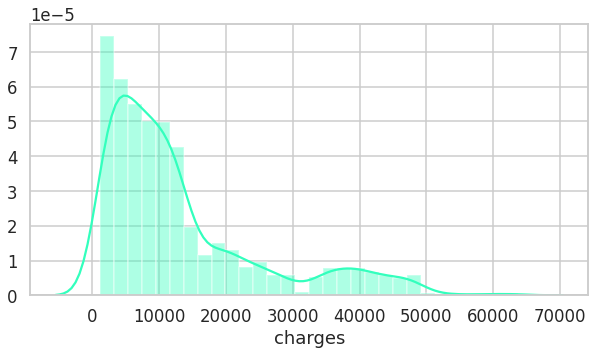

In [ ]:
# Inspecting charges
# Using simple density plot, which is great at detecting outliers

plt.figure(figsize = (10,5))
sns.distplot(df_3['charges'], color='#33FFBD')

In [ ]:
# This surely has outliers
# Let's define function to find lower, upper whisker using Z-Score:

def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

out_zscore(df_3.charges)

Total number of outliers are 7


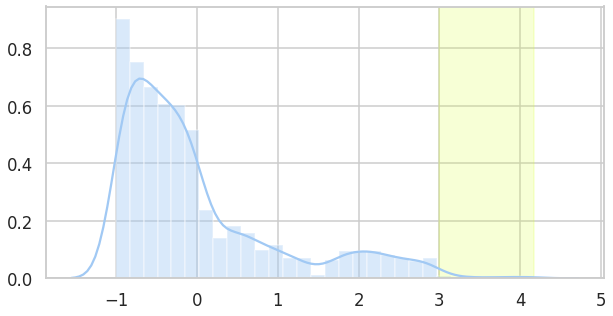

In [ ]:
# Visualizing

plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='#DBFF33')

##### The "yellow zone" represents the outlier zone, and again, data present in that zone are considered outliers!

In [ ]:
# DataFrame without outliers
df_new = df_3[(df_3['charges'] < 3) | (df_3['charges'] > -3)]

# Isolation Forest

##### Isolation forest is an algorithm used to detect outliers. It partitions data using a set of trees and provides an anomaly score looking at how isolated the point is in the structure found. The anomaly score is then used to tell outliers apart from normal observations.

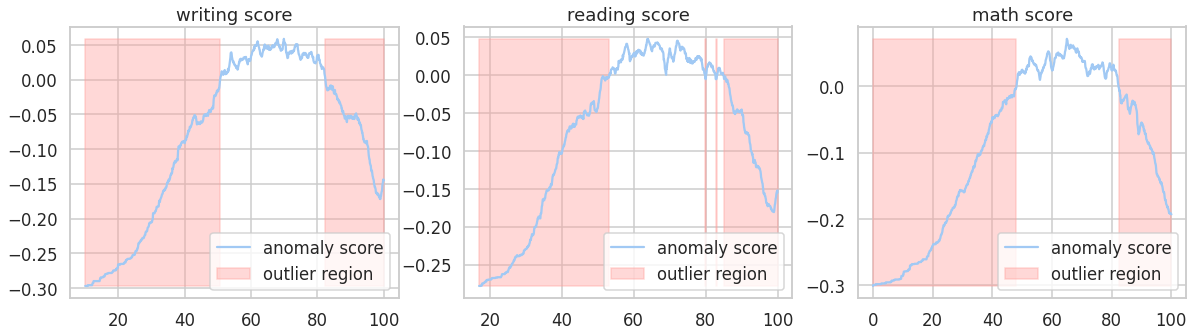

In [ ]:
#Import necessary libraries
from sklearn.ensemble import IsolationForest
#The required columns
cols = ['writing score','reading score','math score']
#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df_2[column].values.reshape(-1,1))

    xx = np.linspace(df_2[column].min(), df_2[column].max(), len(df_2)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

##### We'ved trained our IsolationForest with the data, computed anomoly score for each observation and classified each observation as non-/outliers. The chart above shows anomoly scores and the region the outliers lie. As expected, the score reflects the shape of the underlying distribution and how the outlier regions correspond to low-probability areas.

# Multivariate Outliers:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
#####This is a clustering algorithm (an alternative to K-Means) that clusters points together and identifies any points not belonging to a cluster as outliers. It’s like K-means, except the number of clusters does not need to be specified in advance.

In [ ]:
# We will be focusing on the age and bmi columsn of the insurance dataset for evaluation:

X = df_3[['age', 'bmi']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_
pd.Series(labels).value_counts()

 0    1312
-1      26
dtype: int64

##### The -1's are outliers!

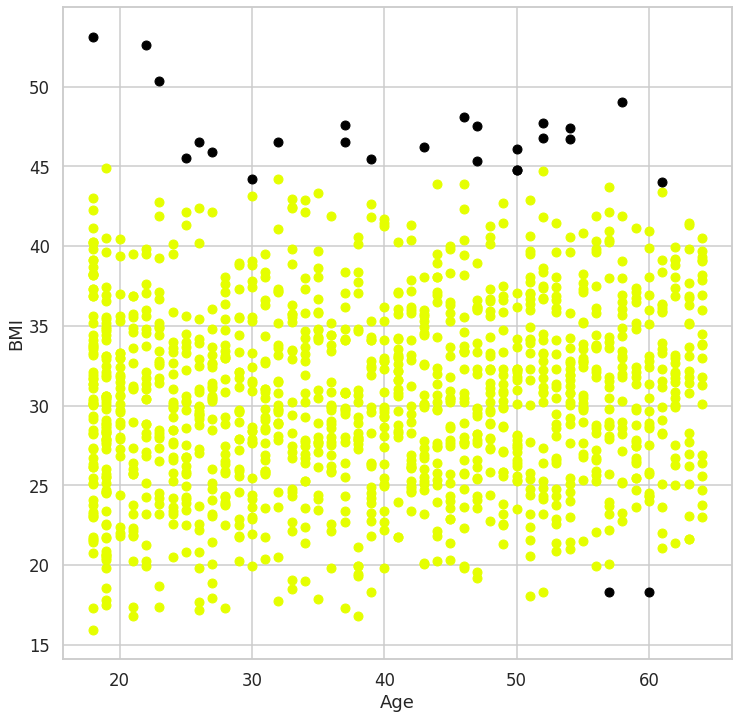

In [ ]:
# Let's plot to differentiate the outliers:
# Setting the color yellow to normal records and black for outliers:

plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['#e5ff00', '#000000']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('Age');
plt.ylabel('BMI');

##### Unforunately that ther higher the dimension, the less accurate this method becomes. But it's ok here, since this is a small set of data.

#2) Local Outlier Factor Method(LOF):
LOF uses density-based outlier detection to identify local outliers, points that are outliers with respect to their local neighborhood, rather than with respect to the global data distribution. The higher the LOF value for an observation, the more anomalous the observation.


In [ ]:
# We are shifting the focus to the age and chol columns of the heart diseases dataset 
# for multivariate analysis:

clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df_1[['age','chol']].values
y_pred = clf.fit_predict(X)

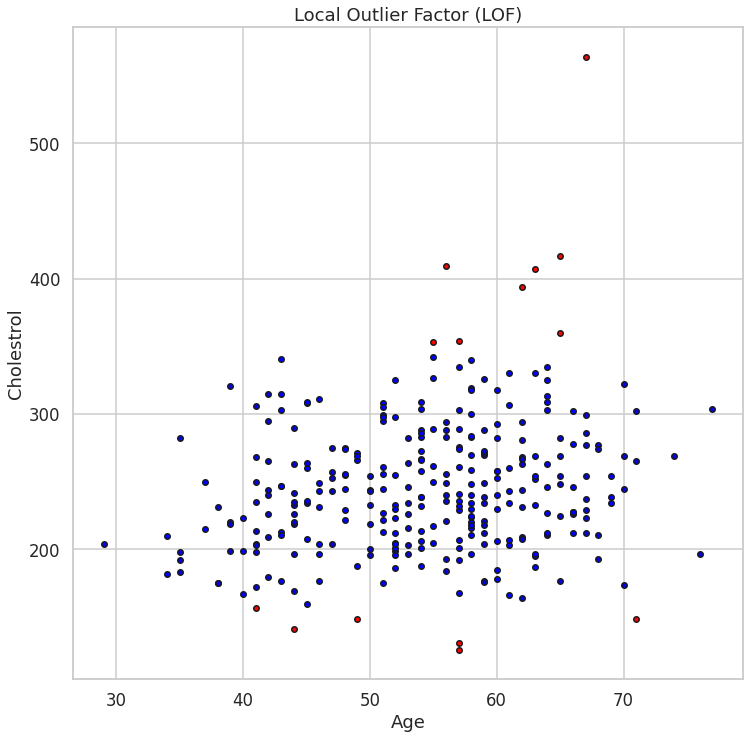

In [ ]:
# Let's plot, vizualize outliers. Setting a blue for normal and red for outlier records!

plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('Cholestrol');
plt.show()

# Conlusion:
While outlier removal forms an essential part of a dataset normalization, it’s important to ensure zero errors in the assumptions that influence outlier removal. Data with even significant number of outliers may not always be bad data and a rigorous investigation of the dataset in itself is often warranted, but overlooked, by data scientists in their processes.

Dataset used: https://www.kaggle.com/mirichoi0218/insurance